# How Release End of Elements along Directions Except Global
## By: Silvia Mazzoni, Bijan SayyafZadeh



In this JuPyter we will discuss about DOF releasing problems and methods to transfer only axial deformation, specially when the elements are not int global direction and we check the results to ensure which choice is the best. The headlines are in this way:

### Part 1: (Horizontal Beam)
* Two Head Fixed Beam with one central node
* Two Head Fixed Beam with two central EqualDOF nodes 
* Two Head Fixed Beam with two central Axial EqualDOF nodes
* Altenatives:
    1. ZeroLength Element
    2. RigidLink Element
    3. Stiff Truss Element
* Final Results of Part 1

### Part 2: (Incline Beam)
1. ZeroLength Element
2. Stiff Truss Element
* Final Reults of Part 2
              

First of all, Importing the requiments:

In [18]:
import openseespy.opensees as ops
import eSEESminiPy as slv
import matplotlib.pyplot as plt
import markdown
%matplotlib notebook
import numpy as np
import math
import pandas as pd

def PerformAnalysis():
    '''
    This Function is set to run analysis
    '''
    
    ops.wipeAnalysis()
    ops.system("BandSPD")                   # create SOE
    ops.numberer("RCM")                     # create DOF number
    ops.constraints("Plain")                # create constraint handler
    ops.integrator("LoadControl", 1.0)      # create integrator
    ops.algorithm("Linear")                 # create algorithm
    ops.analysis("Static")                  # create analysis object
    ops.analyze(1)                          # perform the analysis


# Part 1 : Horizontal Beam
## Two Head Fixed Beam With Concentrated Force at the middle
Consider the simple 2D Below model:

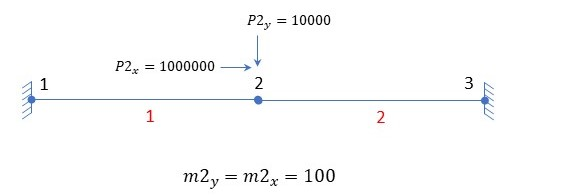

In [19]:
Rs=[] #Results

#Build the 2D model
ops.wipe()
ops.model('basic', '-ndm',2)

#Nodes
ops.node(1, *[0,0]);ops.fix(1,1,1,1)
ops.node(2, *[150,0]); ops.mass(2,100,100,0)
ops.node(3, *[300,0]);ops.fix(3,1,1,1)

#Elements: element('elasticBeamColumn', eleTag, *eleNodes, Area, E_mod, Iz, transfTag, <'-mass', mass>, <'-cMass'>, <'-release', releaseCode>)
A=100.0
E=2.1e6
I= 10.0*10.0*10.0*10.0/12.0
G=2.0e5
transfTag=1
ops.geomTransf('Linear', transfTag)
ops.element('elasticBeamColumn', 1, *[1,2], A, E, I, transfTag)
ops.element('elasticBeamColumn', 2, *[2,3], A, E, I, transfTag)


tsTag=1
ops.timeSeries('Linear', tsTag)
ops.pattern('Plain', 1, tsTag)
ops.load(2, *[1000000,-10000,0])


f=ops.eigen(1)
f=f[0]**0.5


PerformAnalysis()

#dir(slv)
#plt.figure('1')
#slv.drawModel()


For the first Case Displacement at $node2=${{ops.nodeDisp(2)}} 

and eigen value is equal={{f}}




## Two Head Fixed Beam with two central EqualDOF nodes
Now we want to make a release in node 2 how only axial force can be transfer. For this purpose we use $equalDOF$ command and we consider two cases. 1st the nodes are without any release (So the results should be exactly the same in previous step), then in 2nd case we release the rotations and only put axial DOF remains: 

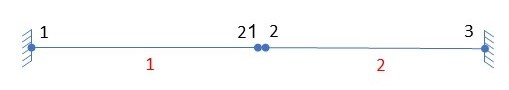

In [20]:
transfTag=1
tsTag=1

ops.wipe()
ops.wipeAnalysis()
ops.model('basic', '-ndm',2)
    
#Nodes
ops.node(1, *[0,0]);ops.fix(1,1,1,1)
ops.node(21, *[150,0]);
ops.node(2, *[150,0]); ops.mass(2,100,100,0)
ops.node(3, *[300,0]);ops.fix(3,1,1,1)
    

ops.equalDOF(21,2,*[1,2,3]) #Without Release
       
    
    
#Elements: element('elasticBeamColumn', eleTag, *eleNodes, Area, E_mod, Iz, transfTag, <'-mass', mass>, <'-cMass'>, <'-release', releaseCode>)
ops.geomTransf('Linear', transfTag)
ops.element('elasticBeamColumn', 1, *[1,21], A, E, I, transfTag)
ops.element('elasticBeamColumn', 2, *[2,3], A, E, I, transfTag)
    
f=ops.eigen(1)
f=f[0]**0.5
    
ops.timeSeries('Linear', tsTag)
ops.pattern('Plain', 1, tsTag)
ops.load(2, *[1000000,-10000,0])

#Predefine Function to perform Analysis
PerformAnalysis()
    
#slv.drawModel()

For the first Case Displacement at $node2=${{ops.nodeDisp(2)}} 

and eigen value is equal={{f}}

As it is seen the results ar completely Compatible with the model with 1 node at the middle and it shows EqualDOF connect degree of freedoms to gether correctly. 

# Two Head Fixed Beam with two central Axial EqualDOF nodes 
## Now Reseasing All Degree Freedoms Except Axial

Because All degree of freedoms are in global Direction, We can using equalDOF command release all Degree of Freedom Except axial that is our purpose of this study and consider the results as exact solution:

<IPython.core.display.Javascript object>


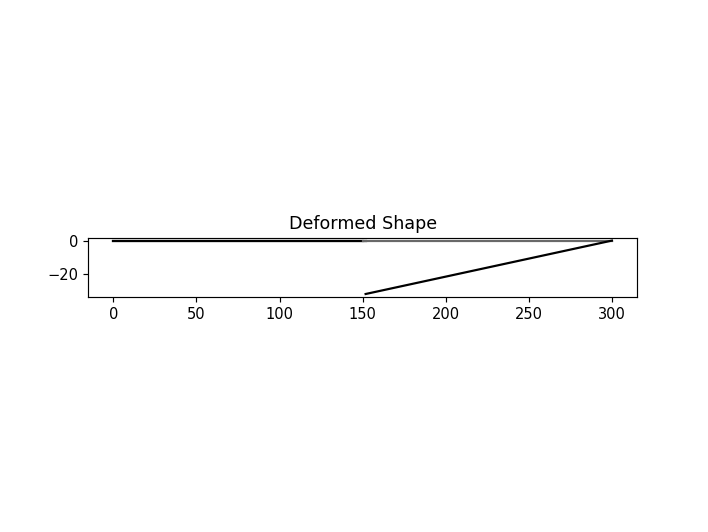

In [21]:
transfTag=1
tsTag=1

Case=2

ops.wipe()
ops.wipeAnalysis()
ops.model('basic', '-ndm',2)
    
#Nodes
ops.node(1, *[0,0]);ops.fix(1,1,1,1)
ops.node(21, *[150,0]);
ops.node(2, *[150,0]); ops.mass(2,100,100,0)
ops.node(3, *[300,0]);ops.fix(3,1,1,1)

ops.equalDOF(21,2,*[1])     #  With Release

       
#Elements: element('elasticBeamColumn', eleTag, *eleNodes, Area, E_mod, Iz, transfTag, <'-mass', mass>, <'-cMass'>, <'-release', releaseCode>)
ops.geomTransf('Linear', transfTag)
    
ops.element('elasticBeamColumn', 1, *[1,21], A, E, I, transfTag)
ops.element('elasticBeamColumn', 2, *[2,3], A, E, I, transfTag)
    
f=ops.eigen(1)
f=f[0]**0.5
    
ops.timeSeries('Linear', tsTag)
ops.pattern('Plain', 1, tsTag)
ops.load(2, *[1000000,-10000,0])
    
#Predefine Function to perform Analysis
PerformAnalysis()
    
Rs.append(['EqualDOF nodes at the Middle With Release (Node2)',ops.nodeDisp(2),f])
Rs.append(['EqualDOF nodes at the Middle With Release (Node21)',ops.nodeDisp(21),f])
slv.drawDeformedShape(5)

Displacement Results at $node2$={{ops.nodeDisp(2)}} 

and for $node21$={{ops.nodeDisp(21)}}

and eigen value is $f=${{f}}

**So we consider these results as correct results and now search for alternative options with different tools.** Alternative tools that will be checked are:
1. Zero Length Element
2. RigidLink Element
3. Stiff Truss Element

## 1. Zero Length Element

Now we want to check the Zero Length Element and check the results. We expect that we get same results that we got for previouse case:

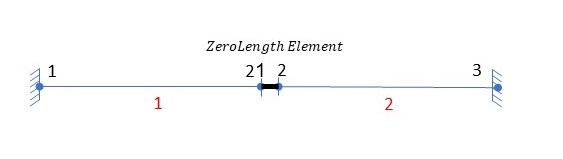

<IPython.core.display.Javascript object>


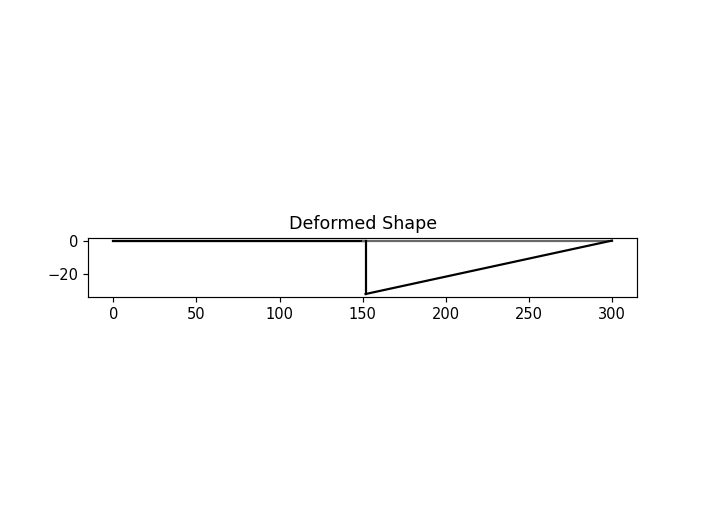

In [22]:
ops.wipe()
ops.wipeAnalysis()
ops.model('basic', '-ndm',2)
    
#Nodes
ops.node(1, *[0,-10*0]);ops.fix(1,1,1,1)
ops.node(21, *[150,0]);
ops.node(2, *[150,0]); ops.mass(2,100,100,0)
ops.node(3, *[300,10*0]);ops.fix(3,1,1,1)
    

#element('zeroLength', eleTag, *eleNodes, '-mat', *matTags, '-dir', *dirs, <'-doRayleigh', rFlag=0>, <'-orient', *vecx, *vecyp>)
matTag=1
ops.uniaxialMaterial('Elastic', matTag, E*1e9)
ops.element('zeroLength', 3, *[21,2], '-mat', *[matTag],'-dir', *[1])#, '-orient', *[300,20,0], *[0,1,0])
  
#Elements: element('elasticBeamColumn', eleTag, *eleNodes, Area, E_mod, Iz, transfTag, <'-mass', mass>, <'-cMass'>, <'-release', releaseCode>)
ops.geomTransf('Linear', transfTag)
ops.element('elasticBeamColumn', 1, *[1,21], A, E, I, transfTag)
ops.element('elasticBeamColumn', 2, *[2,3], A, E, I, transfTag)
    
f=ops.eigen(1)
f=f[0]**0.5
    
ops.timeSeries('Linear', tsTag)
ops.pattern('Plain', 1, tsTag)
ops.load(2, *[1000000,-10000,0])
    
#Predefine Function to perform Analysis
PerformAnalysis()

Rs.append(['ZeroLength Element nodes 2',ops.nodeDisp(2),f])   
Rs.append(['ZeroLength Element nodes 21',ops.nodeDisp(21),f])

slv.drawDeformedShape(5)

Displacement Results at $node2$={{ops.nodeDisp(2)}} 

and for $node21$={{ops.nodeDisp(21)}}

and eigen value is $f=${{f}}

## 2. RigidLink

In this Step we use RigidLink to see the results of this element.

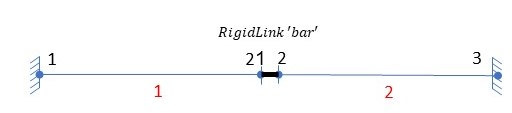

<IPython.core.display.Javascript object>


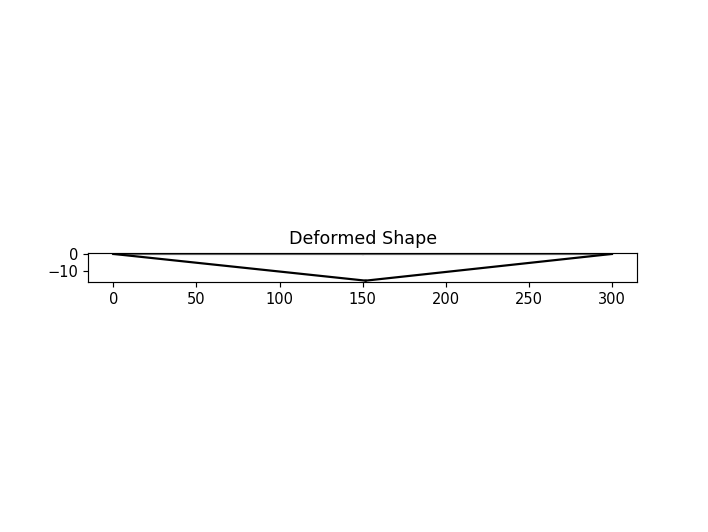

In [23]:
ops.wipe()
ops.wipeAnalysis()
ops.model('basic', '-ndm',2)
    
#Nodes
ops.node(1, *[0,-0]);ops.fix(1,1,1,1)
ops.node(21, *[150,0]);
ops.node(2, *[150,0]); ops.mass(2,100,100,0)
ops.node(3, *[300,0]);ops.fix(3,1,1,1)
    

#rigidLink(type, rNodeTag, cNodeTag)
ops.rigidLink('bar', 21, 2)
  
#Elements: element('elasticBeamColumn', eleTag, *eleNodes, Area, E_mod, Iz, transfTag, <'-mass', mass>, <'-cMass'>, <'-release', releaseCode>)
ops.geomTransf('Linear', transfTag)
ops.element('elasticBeamColumn', 1, *[1,21], A, E, I, transfTag)
ops.element('elasticBeamColumn', 2, *[2,3], A, E, I, transfTag)
    
f=ops.eigen(1)
f=f[0]**0.5
    
ops.timeSeries('Linear', tsTag)
ops.pattern('Plain', 1, tsTag)
ops.load(2, *[1000000,-10000,0])
    
#Predefine Function to perform Analysis
PerformAnalysis()

Rs.append(['RigidLink nodes 2',ops.nodeDisp(2),f])
Rs.append(['RigidLink nodes 21',ops.nodeDisp(21),f])

slv.drawDeformedShape(5)

Displacement Results at $node2$={{ops.nodeDisp(2)}} 

and for $node21$={{ops.nodeDisp(21)}}

and eigen value is $f=${{f}}

So, Seems that RigidLink element is not a proper choice and we can say that:

**if we use rigidLink element for two nodes that are compatible on each other with 'bar' is equal internal pin (Look at the Slope)
and 
if we use rigidLink element for two nodes that are compatible on each other with 'beam' is equal continiues beam**

## 3. Really Stiff Truss Element

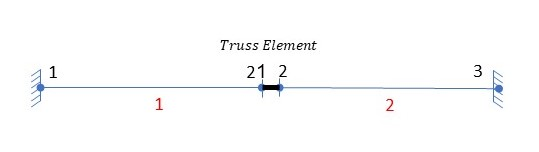

<IPython.core.display.Javascript object>


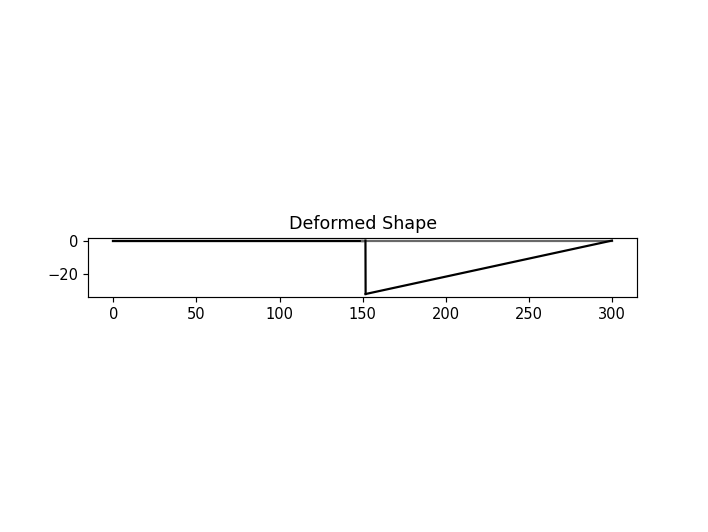

In [24]:
ops.wipe()
ops.wipeAnalysis()
ops.model('basic', '-ndm',2)
    
#Nodes
ops.node(1, *[0,-10*0]);ops.fix(1,1,1,1)
ops.node(21, *[149.9,-0.1*10/150*0]);
ops.node(2, *[150,0]); ops.mass(2,100,100,0)
ops.node(3, *[300,10*0]);ops.fix(3,1,1,1)
    

#element('Truss', eleTag, *eleNodes, A, matTag, <'-rho', rho>, <'-cMass', cFlag>, <'-doRayleigh', rFlag>)
matTag=1
ops.uniaxialMaterial('Elastic', matTag, E*1e6)
ops.element('Truss', 3, *[21,2], A, matTag)
  
#Elements: element('elasticBeamColumn', eleTag, *eleNodes, Area, E_mod, Iz, transfTag, <'-mass', mass>, <'-cMass'>, <'-release', releaseCode>)
ops.geomTransf('Linear', transfTag)
ops.element('elasticBeamColumn', 1, *[1,21], A, E, I, transfTag)
ops.element('elasticBeamColumn', 2, *[2,3], A, E, I, transfTag)
    
f=ops.eigen(1)
f=f[0]**0.5
    
ops.timeSeries('Linear', tsTag)
ops.pattern('Plain', 1, tsTag)
ops.load(2, *[1000000,-10000,0])


#Predefine Function to perform Analysis
PerformAnalysis()
 

Rs.append(['Truss Element nodes 2',ops.nodeDisp(2),f])
Rs.append(['Truss Element nodes 21',ops.nodeDisp(21),f])

slv.drawDeformedShape(5)


Displacement Results at $node2$={{ops.nodeDisp(2)}} 

and for $node21$={{ops.nodeDisp(21)}}

and eigen value is $f=${{f}}

# Final Results of Part 1:

In [25]:
print('Results:')
df = pd.DataFrame([[i[1][0],i[1][1],i[1][2],i[2]] for i in Rs],index=[i[0] for i in Rs], columns=['Ux', 'Uy', 'Theta','Frequency'])
df


Results:


,Ux,Uy,Theta,Frequency
EqualDOF nodes at the Middle With Release (Node2),0.357143,-6.428571,0.064286,3.944053
EqualDOF nodes at the Middle With Release (Node21),0.357143,0.000000,0.000000,3.944053
ZeroLength Element nodes 2,0.357143,-6.428571,0.064286,3.944053
ZeroLength Element nodes 21,0.357143,0.000000,0.000000,3.944053
RigidLink nodes 2,0.357143,-3.214286,0.032143,5.577734
RigidLink nodes 21,0.357143,-3.214286,-0.032143,5.577734
Truss Element nodes 2,0.357024,-6.428571,0.064286,3.944053
Truss Element nodes 21,0.357024,0.000000,0.000000,3.944053


**Results:** As it is seen in above table, **ZeroLength Element Gives Exact Results** and **Truss Element also Gives proper Results** But **Rigid Link in not a good choice for this purpose!**

# Part 2 : Incline Beam
## Two Head Fixed Beam With Concentrated Force at the middle

In this part Because the EqualDOF command is not working on local directions, Using ZeroLength Element and Truss Element, we will model an Incline Beam and check the Deformation Shape and Results.

## 1. Zero Length Element

The same Beam is considered with slope equal to $m=20/300=${{round(20/300,4)}}

<IPython.core.display.Javascript object>


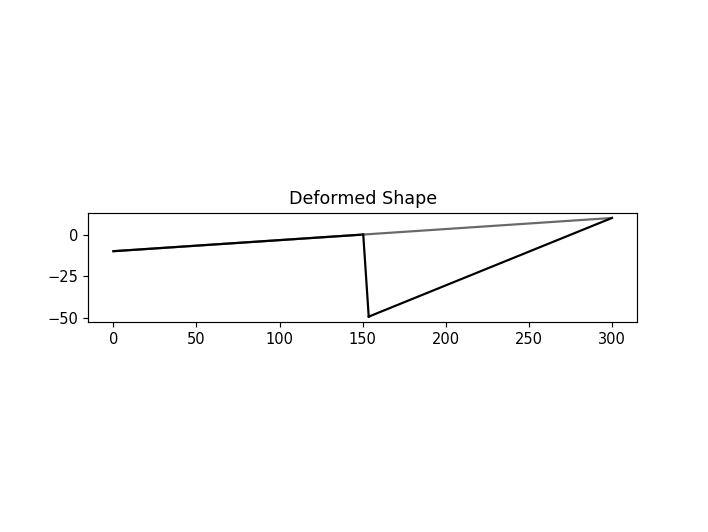

In [26]:
Rss=[]
ops.wipe()
ops.wipeAnalysis()
ops.model('basic', '-ndm',2)
    
#Nodes
ops.node(1, *[0,-10]);ops.fix(1,1,1,1)
ops.node(21, *[150,0]);
ops.node(2, *[150,0]); ops.mass(2,100,100,0)
ops.node(3, *[300,10]);ops.fix(3,1,1,1)
    

#element('zeroLength', eleTag, *eleNodes, '-mat', *matTags, '-dir', *dirs, <'-doRayleigh', rFlag=0>, <'-orient', *vecx, *vecyp>)
matTag=1
ops.uniaxialMaterial('Elastic', matTag, E*1e9)
ops.element('zeroLength', 3, *[21,2], '-mat', *[matTag],'-dir', *[1], '-orient', *[300,20,0], *[0,1,0])
  
#Elements: element('elasticBeamColumn', eleTag, *eleNodes, Area, E_mod, Iz, transfTag, <'-mass', mass>, <'-cMass'>, <'-release', releaseCode>)
ops.geomTransf('Linear', transfTag)
ops.element('elasticBeamColumn', 1, *[1,21], A, E, I, transfTag)
ops.element('elasticBeamColumn', 2, *[2,3], A, E, I, transfTag)
    
f=ops.eigen(1)
f=f[0]**0.5
    
ops.timeSeries('Linear', tsTag)
ops.pattern('Plain', 1, tsTag)
ops.load(2, *[1000000,-10000,0])
    
#Predefine Function to perform Analysis
PerformAnalysis()

Rss.append(['ZeroLength nodes 2',ops.nodeDisp(2),f])   
Rss.append(['ZeroLength nodes 21',ops.nodeDisp(21),f])

slv.drawDeformedShape(1)

Displacement Results at $node2$={{ops.nodeDisp(2)}} 

and for $node21$={{ops.nodeDisp(21)}}

and eigen value is $f=${{f}}

**As Expected** the node 21 don't has any rotation and the it's **displcament vector ratio** $(Ratio=V_y/V_x=${{ops.nodeDisp(21)[1]}}$/${{ops.nodeDisp(21)[0]}}$=${{round(ops.nodeDisp(21)[1]/ops.nodeDisp(21)[0],4)}}$)$ **is exactly equal to the slope of the beam** $(${{round(20/300,4)}}$)$ that **means only axial deformation as we need is transforming**.

## 2. Really Stiff Truss Element

<IPython.core.display.Javascript object>


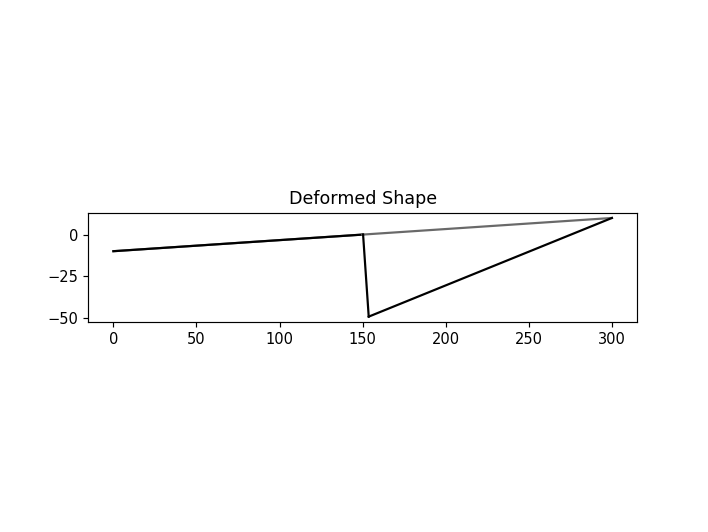

In [27]:
ops.wipe()
ops.wipeAnalysis()
ops.model('basic', '-ndm',2)
    
#Nodes
ops.node(1, *[0,-10]);ops.fix(1,1,1,1)
ops.node(21, *[149.9,-0.1*10/150]);
ops.node(2, *[150,0]); ops.mass(2,100,100,0)
ops.node(3, *[300,10]);ops.fix(3,1,1,1)
    

#element('Truss', eleTag, *eleNodes, A, matTag, <'-rho', rho>, <'-cMass', cFlag>, <'-doRayleigh', rFlag>)
matTag=1
ops.uniaxialMaterial('Elastic', matTag, E*1e6)
ops.element('Truss', 3, *[21,2], A, matTag)
  
#Elements: element('elasticBeamColumn', eleTag, *eleNodes, Area, E_mod, Iz, transfTag, <'-mass', mass>, <'-cMass'>, <'-release', releaseCode>)
ops.geomTransf('Linear', transfTag)
ops.element('elasticBeamColumn', 1, *[1,21], A, E, I, transfTag)
ops.element('elasticBeamColumn', 2, *[2,3], A, E, I, transfTag)
    
f=ops.eigen(1)
f=f[0]**0.5
    
ops.timeSeries('Linear', tsTag)
ops.pattern('Plain', 1, tsTag)
ops.load(2, *[1000000,-10000,0])


ops.wipeAnalysis()
ops.system("BandSPD")                   # create SOE
ops.numberer("RCM")  
ops.test('NormDispIncr',1e-6,10)
ops.constraints("Plain")                # create constraint handler
ops.integrator("LoadControl", 1.0)      # create integrator
ops.algorithm("Newton")                 # create algorithm
ops.analysis("Static")                  # create analysis object
ops.analyze(1)                          # perform the analysis
  

Rss.append(['Truss Element nodes 2',ops.nodeDisp(2),f])
Rss.append(['Truss Element nodes 21',ops.nodeDisp(21),f])

slv.drawDeformedShape(1)

Displacement Results at $node2$={{ops.nodeDisp(2)}} 

and for $node21$={{ops.nodeDisp(21)}}

and eigen value is $f=${{f}}

**As Expected** the node 21 don't has any rotation and the it's **displcament vector ratio** $(Ratio=V_y/V_x=${{ops.nodeDisp(21)[1]}}$/${{ops.nodeDisp(21)[0]}}$=${{round(ops.nodeDisp(21)[1]/ops.nodeDisp(21)[0],4)}}$)$ is **Again Exactly** equal to the slope of the beam (**With NewTon Algorithm**) $(${{round(20/300,4)}}$)$ that **means only axial deformation as we need is transforming**.

# Final Results of Part 2:

In [28]:
print('Results:')
df = pd.DataFrame([[i[1][0],i[1][1],i[1][2],i[2]] for i in Rss],index=[i[0] for i in Rss], columns=['Ux', 'Uy', 'Theta','Frequency'])
df

Results:


,Ux,Uy,Theta,Frequency
ZeroLength nodes 2,3.649125,-49.371425,4.939517e-01,3.930958
ZeroLength nodes 21,0.356114,0.023744,3.402922e-08,3.930958
Truss Element nodes 2,3.649003,-49.371384,4.939512e-01,3.930955
Truss Element nodes 21,0.355996,0.023733,1.213810e-14,3.930955


**Final Result:** For Axial transformation of Incline Elements, ZeroLength Element and Truss Element according above results are proper choices. This results as seen are reached according static analysis and user should check the numeric problems that may arise in other analysis methods and different algorithms.